In [7]:
import pandas as pd
df = pd.read_csv("C:\\Users\\vishw\\OneDrive\\Documents\\Desktop\\project_train_delay\\data\\indian_railway_delay_data_.csv")

# 1. Rename columns
df = df.rename(columns={
    "Destitnation": "Destination",
    "Dealy_min": "Delay_min",
    "Sc_arr__time": "Sch_arr_time",
    # adjust any other typos
})

# 2. Parse dates & times
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# 3. Convert Delay (hh:mm:ss) → minutes (robust)
df['Delay_min'] = pd.to_timedelta(df['Delay_min'], errors='coerce').dt.total_seconds() / 60

# 4. Basic checks
print("rows:", len(df))
print("missing per column:\n", df.isna().sum())
print("duplicates:", df.duplicated().sum())

# 5. Extract useful features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Weekday'] = df['Date'].dt.day_name()
# Scheduled hour if you have scheduled time column:
df['Sch_arr_hour'] = pd.to_datetime(df['Sch_arr_time'], errors='coerce').dt.hour


rows: 100
missing per column:
 Train_id         0
Train_name       0
Train_no         0
Source           0
Destination      0
Date             0
Distance(Km)     0
Sch_arr_time     0
Act_arr_time     0
Delay_min        1
Season           0
Run_frequency    0
dtype: int64
duplicates: 0


C:\Users\vishw\AppData\Local\Temp\ipykernel_6240\2403309172.py:28: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Sch_arr_hour'] = pd.to_datetime(df['Sch_arr_time'], errors='coerce').dt.hour


In [8]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Delay_min'] = pd.to_numeric(df['Delay_min'], errors='coerce')
df['Delay_min'] = df['Delay_min'].fillna(0)
df['Sch_arr_hour'] = pd.to_datetime(df['Sch_arr_time'], errors='coerce').dt.hour


C:\Users\vishw\AppData\Local\Temp\ipykernel_6240\3784950119.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Sch_arr_hour'] = pd.to_datetime(df['Sch_arr_time'], errors='coerce').dt.hour


In [9]:
df['Sch_arr_time'].unique()[:10]


array(['06:30:00', '10:00:00', '09:00:00', '08:00:00', '06:00:00',
       '17:20:00', '01-01-1900 17:20', '04:30:00', '19:25:00',
       '01-01-1900 19:25'], dtype=object)

In [11]:
import pandas as pd
# Convert everything to datetime, let pandas parse automatically
df['Sch_arr_time'] = pd.to_datetime(df['Sch_arr_time'], errors='coerce')

# Extract hour only
df['Sch_arr_hour'] = df['Sch_arr_time'].dt.hour
df['Sch_arr_minute'] = df['Sch_arr_time'].dt.minute

In [14]:
import pandas as pd

# Convert both columns to datetime (handle mixed formats)
df['Sch_arr_time'] = pd.to_datetime(df['Sch_arr_time'], errors='coerce')
df['Act_arr_time'] = pd.to_datetime(df['Act_arr_time'], errors='coerce')

# Extract hour and minute
df['Sch_arr_hour'] = df['Sch_arr_time'].dt.hour
df['Sch_arr_minute'] = df['Sch_arr_time'].dt.minute

df['Act_arr_hour'] = df['Act_arr_time'].dt.hour
df['Act_arr_minute'] = df['Act_arr_time'].dt.minute

# ✅ Calculate delay (in minutes) directly from time difference
df['Calc_delay_min'] = (df['Act_arr_time'] - df['Sch_arr_time']).dt.total_seconds() / 60

# Replace negatives (if any train reached early) with 0
df['Calc_delay_min'] = df['Calc_delay_min'].clip(lower=0)

# Preview
print(df[['Sch_arr_time','Act_arr_time','Delay_min','Calc_delay_min']].head(10))


         Sch_arr_time        Act_arr_time  Delay_min  Calc_delay_min
0 1900-01-01 06:30:00 1900-01-01 07:45:00       75.0            75.0
1 1900-01-01 06:30:00 1900-01-01 06:50:00       20.0            20.0
2 1900-01-01 06:30:00 1900-01-01 08:00:00       90.0            90.0
3 1900-01-01 06:30:00 1900-01-01 06:40:00       10.0            10.0
4 1900-01-01 06:30:00 1900-01-01 07:00:00       30.0            30.0
5 1900-01-01 06:30:00 1900-01-01 06:35:00        5.0             5.0
6 1900-01-01 06:30:00 1900-01-01 07:10:00       40.0            40.0
7 1900-01-01 06:30:00 1900-01-01 08:00:00       90.0            90.0
8 1900-01-01 06:30:00 1900-01-01 06:45:00       15.0            15.0
9 1900-01-01 06:30:00 1900-01-01 07:20:00       50.0            50.0


In [13]:
# Pehle string banalo
df['Sch_arr_time'] = df['Sch_arr_time'].astype(str).str.extract(r'(\d{1,2}:\d{2}:\d{2})')[0]
df['Act_arr_time'] = df['Act_arr_time'].astype(str).str.extract(r'(\d{1,2}:\d{2}:\d{2})')[0]

# Ab proper datetime banao
df['Sch_arr_time'] = pd.to_datetime(df['Sch_arr_time'], format='%H:%M:%S', errors='coerce')
df['Act_arr_time'] = pd.to_datetime(df['Act_arr_time'], format='%H:%M:%S', errors='coerce')


In [16]:
!pip install matplotlib seaborn


                                              0.0/8.1 MB ? eta -:--:--
                                              0.0/8.1 MB ? eta -:--:--
                                              0.0/8.1 MB ? eta -:--:--
                                              0.0/8.1 MB ? eta -:--:--
                                              0.0/8.1 MB ? eta -:--:--
                                              0.1/8.1 MB 403.5 kB/s eta 0:00:20
                                              0.1/8.1 MB 423.5 kB/s eta 0:00:19
     -                                        0.2/8.1 MB 687.0 kB/s eta 0:00:12
     -                                        0.4/8.1 MB 1.1 MB/s eta 0:00:08
     --                                       0.5/8.1 MB 1.3 MB/s eta 0:00:06
     ---                                      0.7/8.1 MB 1.5 MB/s eta 0:00:05
     ---                                      0.8/8.1 MB 1.6 MB/s eta 0:00:05
     ----                                     1.0/8.1 MB 1.8 MB/s eta 0:00:05
     -----     

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\vishw\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\~umpy\\.libs\\libopenblas64__v0.3.21-gcc_10_3_0.dll'
Consider using the `--user` option or check the permissions.


[notice] A new release of pip is available: 23.1.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [20]:
pip install matplotlib seaborn --user


  Using cached matplotlib-3.10.6-cp311-cp311-win_amd64.whl (8.1 MB)
  Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
  Using cached contourpy-1.3.3-cp311-cp311-win_amd64.whl (225 kB)
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
  Using cached fonttools-4.59.2-cp311-cp311-win_amd64.whl (2.3 MB)
  Using cached kiwisolver-1.4.9-cp311-cp311-win_amd64.whl (73 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


C:\Users\vishw\AppData\Local\Temp\ipykernel_6240\3750095225.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_delay.values, y=avg_delay.index, palette="Reds_r")


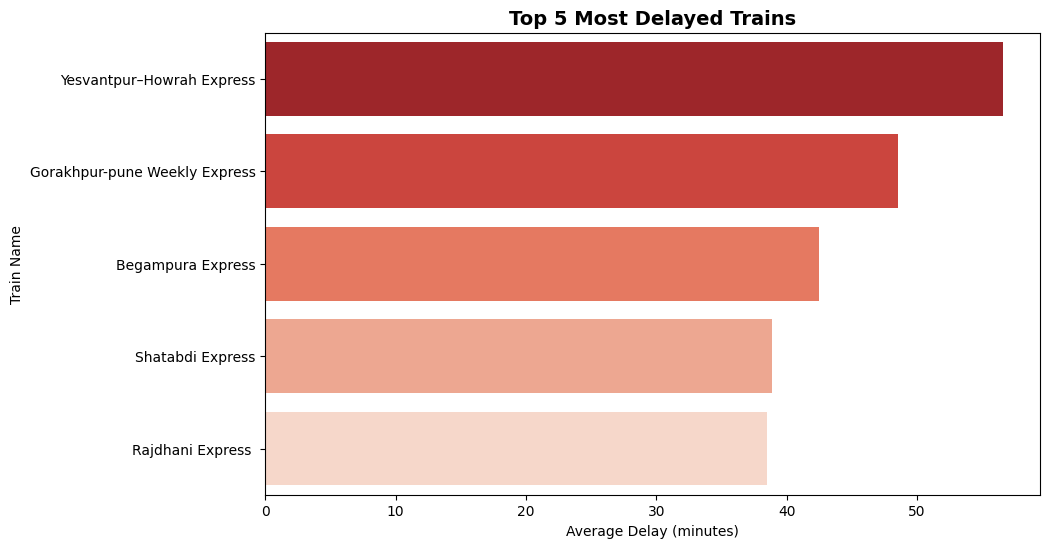

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate average delay per train
avg_delay = df.groupby("Train_name")["Delay_min"].mean().sort_values(ascending=False).head(5)

# Plot bar chart
plt.figure(figsize=(10,6))
sns.barplot(x=avg_delay.values, y=avg_delay.index, palette="Reds_r")

plt.title("Top 5 Most Delayed Trains", fontsize=14, weight="bold")
plt.xlabel("Average Delay (minutes)")
plt.ylabel("Train Name")
plt.show()


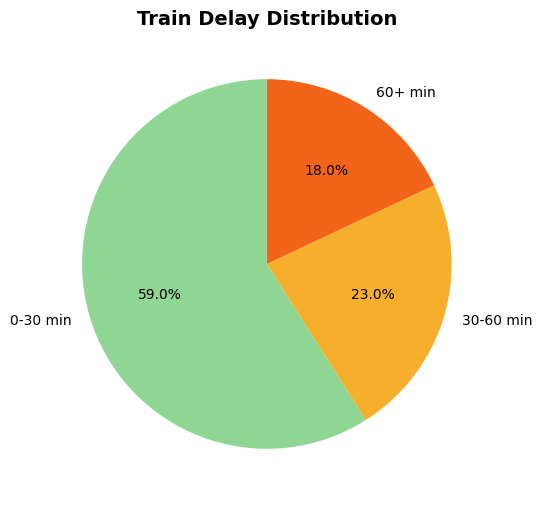

In [22]:
import matplotlib.pyplot as plt

# Create categories
bins = [0, 30, 60, df['Delay_min'].max()]
labels = ['0-30 min', '30-60 min', '60+ min']

df['Delay_Category'] = pd.cut(df['Delay_min'], bins=bins, labels=labels, include_lowest=True)

# Count distribution
delay_counts = df['Delay_Category'].value_counts()

# Plot pie chart
plt.figure(figsize=(6,6))
plt.pie(delay_counts, labels=delay_counts.index, autopct='%1.1f%%', startangle=90, colors=["#8fd694","#f6ae2d","#f26419"])
plt.title("Train Delay Distribution", fontsize=14, weight="bold")
plt.show()


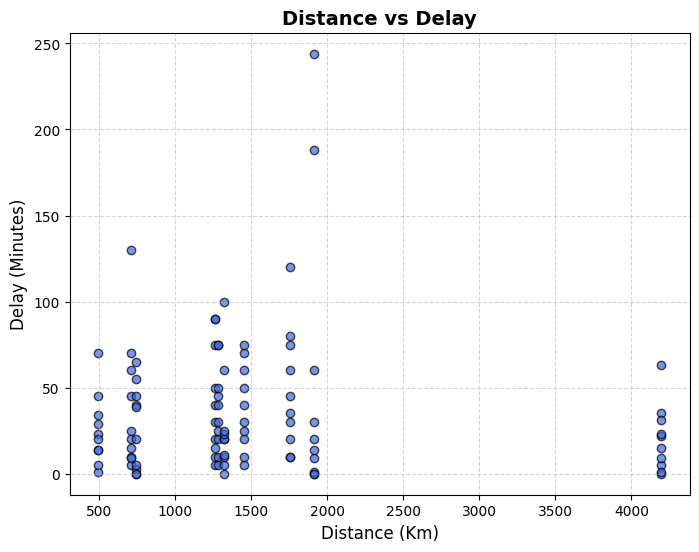

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(df['Distance(Km)'], df['Delay_min'], 
            color="royalblue", alpha=0.7, edgecolors="k")

plt.title("Distance vs Delay", fontsize=14, weight="bold")
plt.xlabel("Distance (Km)", fontsize=12)
plt.ylabel("Delay (Minutes)", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.5)

plt.show()


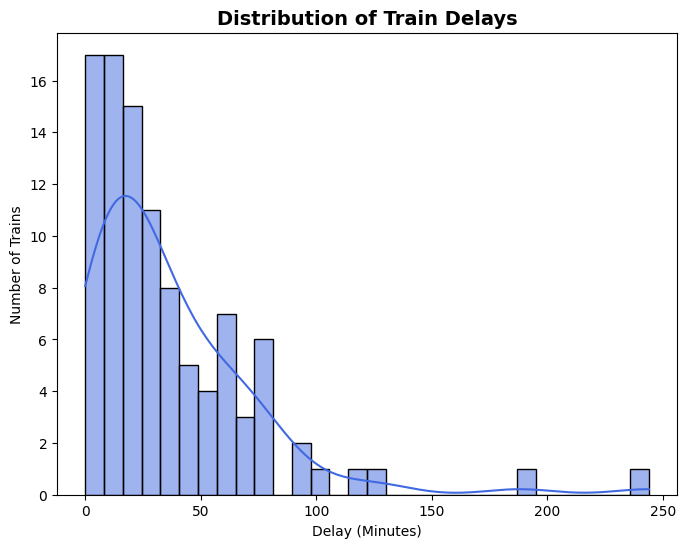

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.histplot(df['Calc_delay_min'], bins=30, kde=True, color="royalblue")

plt.title("Distribution of Train Delays", fontsize=14, weight="bold")
plt.xlabel("Delay (Minutes)")
plt.ylabel("Number of Trains")
plt.show()


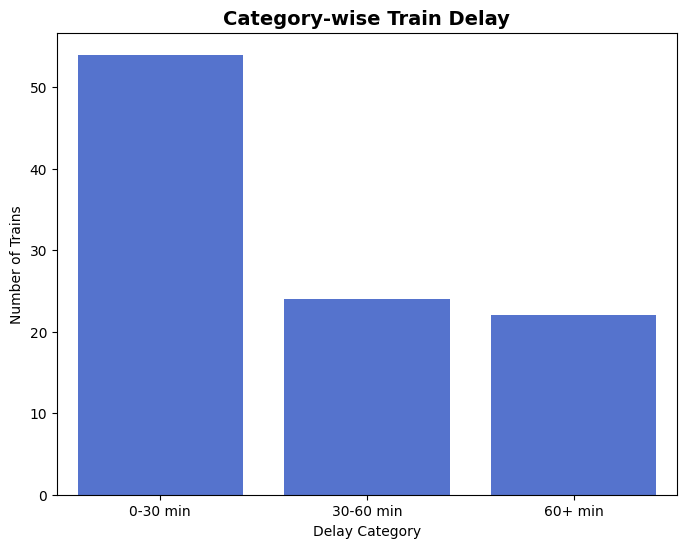

In [ ]:
#Category-wise Delay Distribution
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Category create karna
bins = [0, 30, 60, df['Calc_delay_min'].max()+1]
labels = ['0-30 min', '30-60 min', '60+ min']
df['Delay_category'] = pd.cut(df['Calc_delay_min'], bins=bins, labels=labels, right=False)

# Category-wise count
category_counts = df['Delay_category'].value_counts().sort_index()

# Bar plot
plt.figure(figsize=(8,6))
sns.barplot(x=category_counts.index, y=category_counts.values, color="#4169E1")  # royalblue hex

plt.title("Category-wise Train Delay", fontsize=14, weight="bold")
plt.xlabel("Delay Category")
plt.ylabel("Number of Trains")
plt.show()


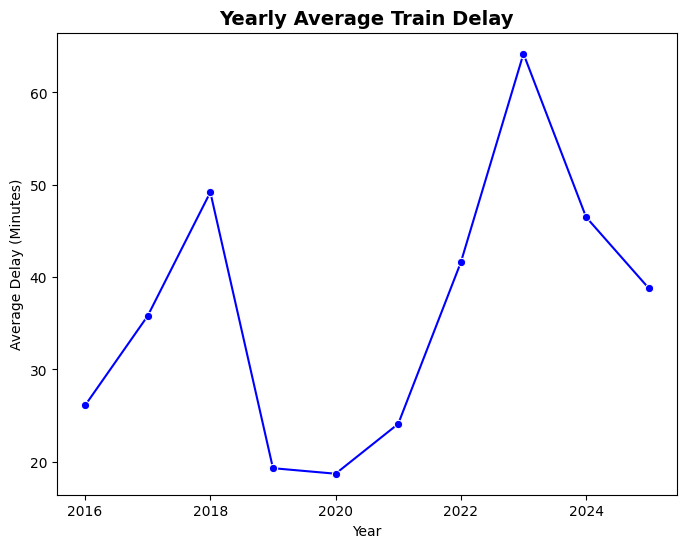

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure 'Date' column is datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extract year
df['Year'] = df['Date'].dt.year

# Calculate yearly average delay
yearly_avg_delay = df.groupby('Year')['Calc_delay_min'].mean().reset_index()

# Plot
plt.figure(figsize=(8,6))
sns.lineplot(data=yearly_avg_delay, x='Year', y='Calc_delay_min', marker='o', color='blue')

plt.title("Yearly Average Train Delay", fontsize=14, weight="bold")
plt.xlabel("Year")
plt.ylabel("Average Delay (Minutes)")
plt.show()


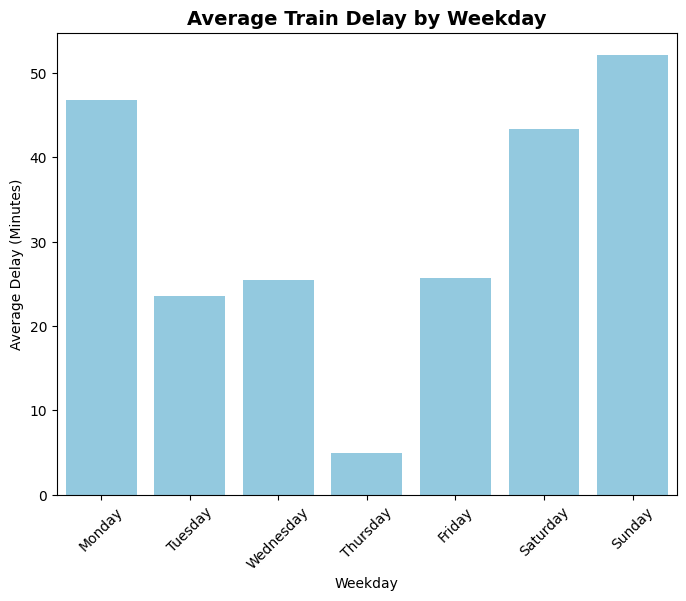

In [31]:
# Ensure 'Date' column is datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extract weekday name
df['Weekday'] = df['Date'].dt.day_name()

# Calculate average delay per weekday
weekday_avg_delay = df.groupby('Weekday')['Calc_delay_min'].mean().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
).reset_index()

# Plot
plt.figure(figsize=(8,6))
sns.barplot(x='Weekday', y='Calc_delay_min', data=weekday_avg_delay, color='skyblue')


plt.title("Average Train Delay by Weekday", fontsize=14, weight="bold")
plt.xlabel("Weekday")
plt.ylabel("Average Delay (Minutes)")
plt.xticks(rotation=45)
plt.show()


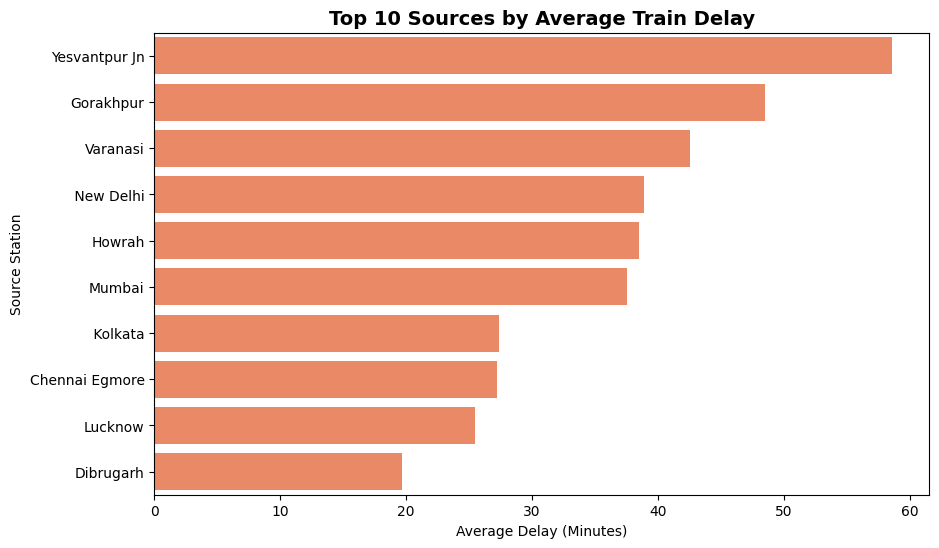

In [32]:
# Calculate average delay per Source
source_avg_delay = df.groupby('Source')['Calc_delay_min'].mean().sort_values(ascending=False).reset_index()

# Plot top 10 sources with highest delay
plt.figure(figsize=(10,6))
sns.barplot(x='Calc_delay_min', y='Source', data=source_avg_delay.head(10), color='coral')

plt.title("Top 10 Sources by Average Train Delay", fontsize=14, weight="bold")
plt.xlabel("Average Delay (Minutes)")
plt.ylabel("Source Station")
plt.show()


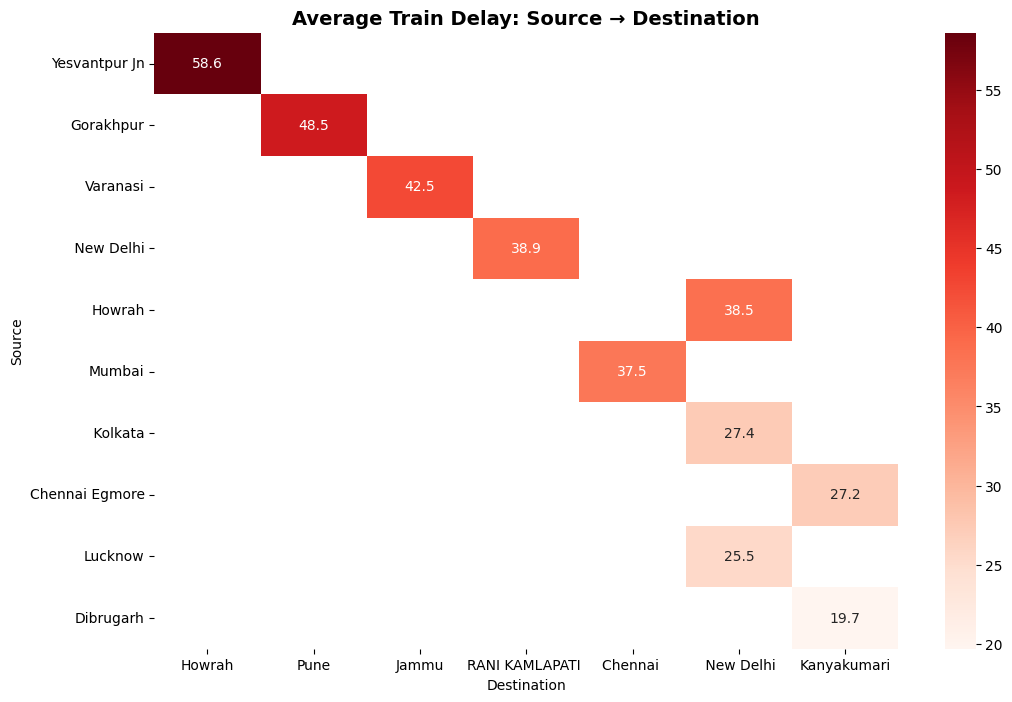

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Pivot table: Source × Destination → average delay
route_delay = df.pivot_table(values='Calc_delay_min', index='Source', columns='Destination', aggfunc='mean')

# Optional: Top 10 sources and destinations to keep plot readable
top_sources = route_delay.mean(axis=1).sort_values(ascending=False).head(10).index
top_destinations = route_delay.mean(axis=0).sort_values(ascending=False).head(10).index
route_delay_top = route_delay.loc[top_sources, top_destinations]

# Plot heatmap
plt.figure(figsize=(12,8))
sns.heatmap(route_delay_top, annot=True, fmt=".1f", cmap='Reds')

plt.title("Average Train Delay: Source → Destination", fontsize=14, weight="bold")
plt.xlabel("Destination")
plt.ylabel("Source")
plt.show()


In [ ]:
!pip install plotly


In [47]:
import plotly.graph_objects as go
import pandas as pd

# -----------------------------
# 1️⃣ Prepare Data
# -----------------------------
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Week'] = df['Date'].dt.isocalendar().week

# Top 10 Sources & Destinations overall
top_sources = df.groupby('Source')['Calc_delay_min'].mean().sort_values(ascending=False).head(10).index
top_destinations = df.groupby('Destination')['Calc_delay_min'].mean().sort_values(ascending=False).head(10).index

df_filtered = df[df['Source'].isin(top_sources) & df['Destination'].isin(top_destinations)]

# -----------------------------
# 2️⃣ Prepare heatmaps for all Year-Week combos
# -----------------------------
year_week_combos = sorted(df_filtered[['Year','Week']].drop_duplicates().values.tolist())
heatmaps = []

for year, week in year_week_combos:
    pivot = df_filtered[(df_filtered['Year']==year) & (df_filtered['Week']==week)].pivot_table(
        values='Calc_delay_min', index='Source', columns='Destination', aggfunc='mean'
    ).reindex(index=top_sources, columns=top_destinations)
    
    heatmaps.append(go.Heatmap(
        z=pivot.values,
        x=pivot.columns,
        y=pivot.index,
        colorscale='Reds',
        zmin=df_filtered['Calc_delay_min'].min(),
        zmax=df_filtered['Calc_delay_min'].max(),
        visible=False,
        colorbar=dict(title="Avg Delay")
    ))

# Make first combination visible
heatmaps[0].visible = True

# -----------------------------
# 3️⃣ Create Dropdown Buttons
# -----------------------------
buttons = []
for i, (year, week) in enumerate(year_week_combos):
    visibility = [False]*len(heatmaps)
    visibility[i] = True
    buttons.append(dict(
        label=f"Year {year} - Week {week}",
        method="update",
        args=[{"visible": visibility},
              {"title": f"Average Train Delay: Year {year} - Week {week}"}]
    ))

# -----------------------------
# 4️⃣ Create Figure
# -----------------------------
fig = go.Figure(data=heatmaps)
fig.update_layout(
    updatemenus=[dict(active=0, buttons=buttons, x=1.2, y=0.5)],
    title=f"Average Train Delay: Year {year_week_combos[0][0]} - Week {year_week_combos[0][1]}",
    xaxis_title="Destination",
    yaxis_title="Source",
    width=1000,
    height=700
)

fig.show()


In [48]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

# -----------------------------
# 1️⃣ Prepare Data
# -----------------------------
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Week'] = df['Date'].dt.isocalendar().week
df['Weekday'] = df['Date'].dt.day_name()

# Delay Categories
bins = [0, 30, 60, df['Calc_delay_min'].max()+1]
labels = ['0-30 min', '30-60 min', '60+ min']
df['Delay_category'] = pd.cut(df['Calc_delay_min'], bins=bins, labels=labels, right=False)

# Top 10 Sources & Destinations overall
top_sources = df.groupby('Source')['Calc_delay_min'].mean().sort_values(ascending=False).head(10).index
top_destinations = df.groupby('Destination')['Calc_delay_min'].mean().sort_values(ascending=False).head(10).index
df_filtered = df[df['Source'].isin(top_sources) & df['Destination'].isin(top_destinations)]

# -----------------------------
# 2️⃣ Prepare Subplots (2x2)
# -----------------------------
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=("Category-wise Delay", "Yearly Average Delay", "Weekday-wise Average Delay", "Source→Destination Heatmap"),
    specs=[[{"type": "bar"}, {"type": "scatter"}],
           [{"type": "bar"}, {"type": "heatmap"}]]
)

# -----------------------------
# 3️⃣ Category-wise Delay
# -----------------------------
cat_counts = df['Delay_category'].value_counts().sort_index()
fig.add_trace(go.Bar(x=cat_counts.index, y=cat_counts.values, marker_color='royalblue'), row=1, col=1)

# -----------------------------
# 4️⃣ Yearly Trend
# -----------------------------
year_avg = df.groupby('Year')['Calc_delay_min'].mean()
fig.add_trace(go.Scatter(x=year_avg.index, y=year_avg.values, mode='lines+markers', line=dict(color='green')), row=1, col=2)

# -----------------------------
# 5️⃣ Weekday Trend
# -----------------------------
weekday_avg = df.groupby('Weekday')['Calc_delay_min'].mean().reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
fig.add_trace(go.Bar(x=weekday_avg.index, y=weekday_avg.values, marker_color='orange'), row=2, col=1)

# -----------------------------
# 6️⃣ Source→Destination Heatmap (First Year-Week)
# -----------------------------
year_week_combos = sorted(df_filtered[['Year','Week']].drop_duplicates().values.tolist())
first_year, first_week = year_week_combos[0]

pivot = df_filtered[(df_filtered['Year']==first_year) & (df_filtered['Week']==first_week)].pivot_table(
    values='Calc_delay_min', index='Source', columns='Destination', aggfunc='mean'
).reindex(index=top_sources, columns=top_destinations)

heatmap = go.Heatmap(z=pivot.values, x=pivot.columns, y=pivot.index, colorscale='Reds', colorbar=dict(title="Avg Delay"))
fig.add_trace(heatmap, row=2, col=2)

# -----------------------------
# 7️⃣ Update Layout
# -----------------------------
fig.update_layout(height=900, width=1200, showlegend=False, title_text="Train Delay Dashboard")

# -----------------------------
# 8️⃣ Year-Week Dropdown for Heatmap
# -----------------------------
heatmap_buttons = []
for i, (year, week) in enumerate(year_week_combos):
    pivot = df_filtered[(df_filtered['Year']==year) & (df_filtered['Week']==week)].pivot_table(
        values='Calc_delay_min', index='Source', columns='Destination', aggfunc='mean'
    ).reindex(index=top_sources, columns=top_destinations)
    
    heatmap_buttons.append(dict(
        label=f"Year {year} - Week {week}",
        method="restyle",
        args=[{"z": [pivot.values]}, [3]],  # Heatmap trace index = 3 (4th trace)
    ))

fig.update_layout(
    updatemenus=[dict(active=0, buttons=heatmap_buttons, x=1.2, y=0.5)]
)

fig.show()


In [51]:
top_trains = df['Train_name'].value_counts().head(10)
print(top_trains)

#Kaunse trains sabse zyada run hue

Train_name
Begampura Express                10
Gorakhpur-pune Weekly Express    10
Rajdhani Express                 10
Chennai Express                  10
Garib Rath Express               10
Shatabdi Express                 10
Lucknow Mail                     10
Kanyakumari Express              10
Yesvantpur–Howrah Express        10
Vivek Express                    10
Name: count, dtype: int64


In [ ]:
route_delay = df.groupby(['Source','Destination'])['Calc_delay_min'].mean().sort_values(ascending=False).head(10)
print(route_delay)
#Agar kisi Source → Destination route pe consistently high delay hai.

Source          Destination    
Yesvantpur Jn   Howrah             58.6
Gorakhpur       Pune               48.5
Varanasi        Jammu              42.5
 New Delhi      RANI KAMLAPATI     38.9
Howrah           New Delhi         38.5
Mumbai          Chennai            37.5
 Kolkata         New Delhi         27.4
Chennai Egmore  Kanyakumari        27.2
Lucknow          New Delhi         25.5
Dibrugarh       Kanyakumari        19.7
Name: Calc_delay_min, dtype: float64


In [50]:
train_delay = df.groupby('Train_name')['Calc_delay_min'].mean().sort_values(ascending=False).head(10)
print(train_delay)
#Kaunse trains hamesha late hoti hain.

Train_name
Yesvantpur–Howrah Express        58.6
Gorakhpur-pune Weekly Express    48.5
Begampura Express                42.5
Shatabdi Express                 38.9
Rajdhani Express                 38.5
Chennai Express                  37.5
Garib Rath Express               27.4
Kanyakumari Express              27.2
Lucknow Mail                     25.5
Vivek Express                    19.7
Name: Calc_delay_min, dtype: float64
